In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
t_step = 0.05
# t_step = 0.4
# b = 4.99
const = 1
#


---
# Решение дифференциального уравнения методом Эйлера и неявной схемой

Выполнил студент 1го года магистратуры физического факультета филиала МГУ
в городе Сарове:
Пономаренко Дмитрий Сергеевич

## Общий вид уравнения
Уравнение имеет вид:

\begin{equation} \label{eq1}

\begin{aligned}
\frac{d^2x}{dt^2} + \sigma\frac{dx}{dt} = \left\{
\begin{array}{cc}
&-x - 0.1x^3, \\
&-1.1
\end{array}
\right .
\end{aligned}
\end{equation}

In [11]:
# $$f(t,x) = - (t - \frac{t^2}{2} + \frac{t^3}{6})$$

# С граничным условием $$ x(t=0) = c $$  где $$ с > 0$$

### Аналитическое решение
Аналитичесское решение данного уравнения:

$$x = \frac{24}{12t^2 - 4t^3 + t^4 + const} $$

### Метод Эйлера (явный метод)

Общий вид решения методом Эйлера: $$x_{n+1}= x_n + f(x_n,t_n)\cdot\Delta t$$

Подставим наше уравнение и получим:


$$x_{n+1}= x_n + t_t\cdot x^2_n\cdot\Delta t$$ где $$t_t = t_n - \frac{t_n^2}{2} + \frac{t^3_n}{6} $$

### Неявный метод
Общий вид уравнения: $$x_{n+1} = x_n + f(x_{n+1},t_{x+1})\Delta t $$

Подставим наше уравнение и получим:

$$x_{n+1} = x_n + f(x_{n+1},t_{x+1})\Delta t x^2_{n+1} $$ , решаем квадратное уранение

$$\Delta t \cdot t_{t+1} x^2_{x+1} + x_{n+1} - x_n = 0$$ где $$t_{t+1} = (t_{t+1} - \frac {t_{t+1}^2}{2} + \frac {t_{t+1}^3}{6} ) $$

Корень уравнения:
$$x_{n+1} = \frac{-1 +\sqrt{1+4\Delta t x_n t_{t}}}{2\Delta t t_{t+1}} $$

Поскольку x > 0, отрицательный корень уравнения не рассматриваем.

## Решение и сравнение
Шаг по t = 0.05

21.818179438096124


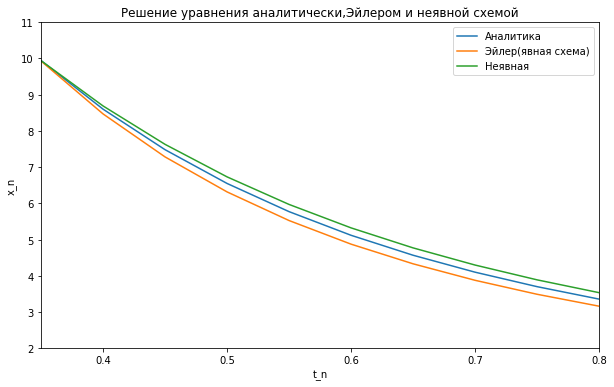

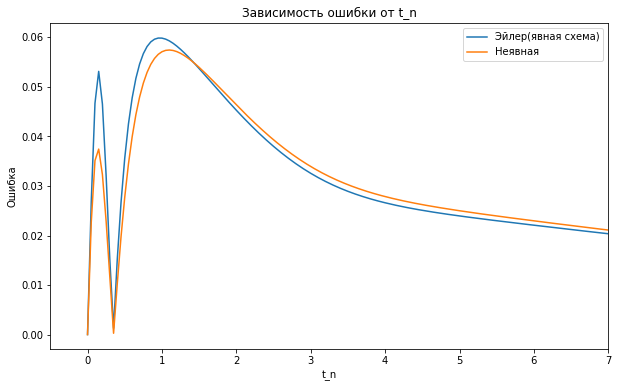

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
t_step = 0.05
# t_step = 0.9
# b =  4.99
const = 1.1
dtype = np.float64

an_t = np.arange(start=0.0001,stop=50.,step=t_step,dtype=dtype)
an_x = (24/(12*an_t**2 - 4*an_t**3 + an_t**4 + const))
b = an_x[0]
print(an_x[0])

number = len(an_t)
neiv_x = np.zeros(number,dtype=dtype)
neiv_t = np.copy(an_t)
neiv_x[0] = b
ivn_x = np.zeros(number,dtype=dtype)
ivn_t = np.copy(an_t)
ivn_x[0] = b
for i in range(number-1):
    neiv_x[i+1] = neiv_x[i] - (neiv_t[i]-neiv_t[i]**2/2+neiv_t[i]**3/6)*t_step*neiv_x[i]**2
    t_t = ivn_t[i+1] - (ivn_t[i+1]**2)/2 + (ivn_t[i+1]**3)/6
    ivn_x[i+1] = (-1 + np.sqrt(1+ 4*t_step*t_t*ivn_x[i]))/(2*t_step*t_t)
plt.figure(figsize=(10,6))
plt.xlabel("t_n")
plt.ylabel("x_n")
plt.xlim(left= 0.35,right=0.8)
plt.ylim(bottom=2,top=11)
plt.title("Решение уравнения аналитически,Эйлером и неявной схемой")
plt.plot(an_t,an_x,label = "Аналитика")
plt.plot(neiv_t,neiv_x, label="Эйлер(явная схема)")
plt.plot(ivn_t,ivn_x, label="Неявная")
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.xlabel("t_n")
plt.ylabel("Ошибка")
plt.xlim(left=-0.5,right=7)
plt.title('Зависимость ошибки от t_n')
# plt.plot(an_t,an_x,label = "Аналитика")
plt.plot(neiv_t,np.array(np.abs(neiv_x/an_x-1)), label="Эйлер(явная схема)")
plt.plot(ivn_t,np.array(np.abs(ivn_x/an_x-1)), label="Неявная")
plt.legend()
plt.show()

### Демонстрация неустойчивости схемы Эйлера
#### Оценка шага
Оценим значение шага, при котором проявляется неустойчивость явной схемы

$$\Delta t < \frac {2}{|\frac {df}{dx}|} $$

Возьмем нашу производную f по x и получим:
$$\Delta t < \frac{1}{x_n(t_n - \frac{t^2_n}{2}+\frac{t^3_n}{6})} $$,

Значение шагаограничено сверху некоторым числом, а значит
нам нужно найти минимальное значение нашей дроби. Вся дробь будет
минимальной, если знаменатель будет максимальным.
Построим численно график нашего выражения

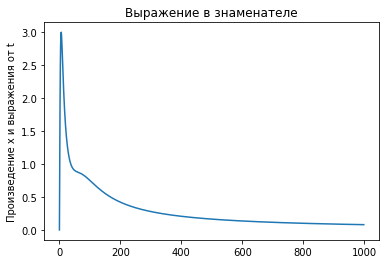

Максимум в x = 2.9940497832504804


In [13]:
dt = np.array((an_t-an_t**2/2+an_t**3/6)*an_x)
plt.plot(dt)
plt.title('Выражение в знаменателе')
plt.xlabel('')
plt.ylabel('Произведение x и выражения от t')
plt.show()
np.max(dt)
idx = np.where(dt == dt.max())
# print(dt[idx])
# print(1/2.994)
# print(1/(b*(an_t[1]-an_t[1]^2 /2))
print(f'Максимум в x = {dt.max()}')

Анлизируя наше выражение, находим максимальное значение, равное 2.994 и получаем численную оценку нашего шага:

$$\Delta t < 0.334 $$

Значит, для проявления неустойчивости возьмем шаг по t = 0.5

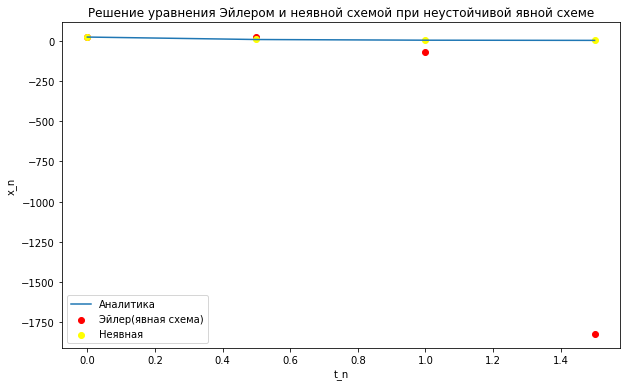

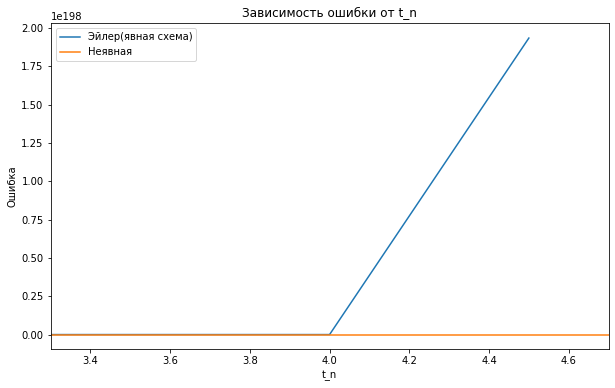

In [14]:

t_step = 0.5
an_t = np.arange(start=0.,stop=50.,step=t_step,dtype=dtype)
an_x = (24/(12*an_t**2 - 4*an_t**3 + an_t**4 + const))
b = an_x[0]


number = len(an_t)
neiv_x = np.zeros(number,dtype=dtype)
neiv_t = np.copy(an_t)
neiv_x[0] = b
ivn_x = np.zeros(number,dtype=dtype)
ivn_t = np.copy(an_t)
ivn_x[0] = b
for i in range(number-1):
    neiv_x[i+1] = neiv_x[i] - (neiv_t[i]-neiv_t[i]**2/2+neiv_t[i]**3/6)*t_step*neiv_x[i]**2
    t_t = ivn_t[i+1] - (ivn_t[i+1]**2)/2 + (ivn_t[i+1]**3)/6
    ivn_x[i+1] = (-1 + np.sqrt(1+ 4*t_step*t_t*ivn_x[i]))/(2*t_step*t_t)
# neiv_x = neiv_x.T


plt.figure(figsize=(10,6))

plt.xlabel("t_n")
plt.ylabel("x_n")
# plt.xlim(left= 3.3,right=5.)
# plt.ylim(bottom=-0.2, top = 0.)
plt.title("Решение уравнения Эйлером и неявной схемой при неустойчивой явной схеме")
plt.plot(an_t[:4],an_x[:4],label = "Аналитика")
plt.scatter(neiv_t[:4],neiv_x[:4], label="Эйлер(явная схема)",color='red')
plt.scatter(ivn_t[:4],ivn_x[:4], label="Неявная",color = 'yellow')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.xlabel("t_n")
plt.ylabel("Ошибка")
plt.xlim(left= 3.3,right=4.7)
plt.title('Зависимость ошибки от t_n')
# plt.plot(an_t,an_x,label = "Аналитика")
plt.plot(neiv_t,np.array(np.abs(neiv_x/an_x-1)), label="Эйлер(явная схема)")
plt.plot(ivn_t,np.array(np.abs(ivn_x/an_x-1)), label="Неявная")
plt.legend()
plt.show()

### Зависимость шага от свободного параметра

$$\Delta t < \frac{1}{с(t_n - \frac{t^2_n}{2}+\frac{t^3_n}{6})} $$



In [15]:
# delta_t = np.array(1/(an_x*(an_t-an_t**2/2+an_t**3/6)))
# # delta_t[delta_t==np.inf] = np.max(delta_t)
# # print(np.argmax(delta_t))
# plt.plot(an_t,delta_t)
# plt.show()
# delta_t[1]

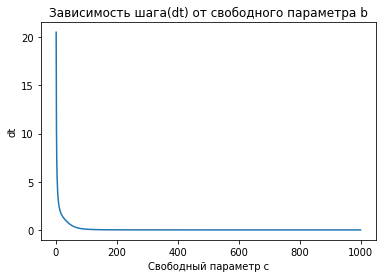

In [16]:
t_step = 0.05
const = 1
an_t = np.arange(start=0.,stop=50.,step=t_step,dtype=dtype)
an_x = (24/(12*an_t**2 - 4*an_t**3 + an_t**4 + const))
delta_t = []
# delta_t 1/((an_t-an_t**2/2+an_t**3/6))[1]
for i in range(0,an_t.shape[0]):
    delta_t.append(np.array(1/(i*(an_t-an_t**2/2+an_t**3/6))))
plt.plot(range(0,an_t.shape[0]),delta_t[:][1])
# plt.xlim(right=4)
plt.title('Зависимость шага(dt) от свободного параметра b')
plt.xlabel('Свободный параметр c')
plt.ylabel('dt')
plt.show()



In [17]:
# b = np.arange(0,1.1,0.1)
# t_step = 0.5
# const = 0.1
# delta_t = np.array(1/(an_x*(an_t-an_t**2/2+an_t**3/6)))[1]
# an_t = np.arange(start=0.,stop=50.,step=t_step,dtype=dtype)
# an_x = (24/(12*an_t**2 - 4*an_t**3 + an_t**4 + const))
# for i in b:
#     # an_t = np.arange(start=0.,stop=50.,step=t_step,dtype=dtype)
#     # an_x = (24/(12*an_t**2 - 4*an_t**3 + an_t**4 + const))
#     delta_t = np.append(delta_t,np.array(1/(b*(an_t-an_t**2/2+an_t**3/6)),dtype=dtype)[1])
# # delta_t = an_x[0]*(an_t-an_t**2+an_t**3 )
# delta_t

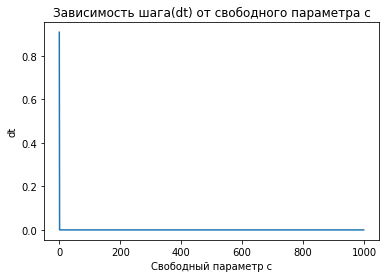

In [24]:
const = 1.1
t_step = 0.05
an_t = np.arange(start=0.,stop=50.,step=t_step,dtype=dtype)
an_x = (24/(12*an_t**2 - 4*an_t**3 + an_t**4 + const))
delta_t = np.zeros(shape=an_t.shape[0])
for i in range(0,an_t.shape[0]):
    delta_t[i]= 1/(i*np.array(an_t-an_t**2/2+an_t**3/6).max()+const)
plt.plot(delta_t)
# plt.xlim(right=4)
plt.title('Зависимость шага(dt) от свободного параметра с')
plt.xlabel('Свободный параметр c')
plt.ylabel('dt')
plt.show()